In [1]:
import numpy as np
X = np.array([[1, 2], [2, 2], [6, 8],[7 ,8]])
C = np.array([[1.0, 2.0], [2.0, 2.0]]) #聚类中心
iters = 3#迭代次数
while iters>0 :
    iters -= 1
    A = []
    for c in C:#遍历每一个聚类中心，计算样本到每个聚类中心的距离,保存到A
        a = np.sqrt(np.sum((X-c)**2,axis=1))
        A.append(a)
    A = np.array(A)
    print(A)
    
    #将样本分配到所属的聚类中心 
    minidx = np.argmin(A,axis=0)  #[0 1 1 1]
    print(minidx)
    
       
    for i in range(len(C)):#获取每个簇的样本，求质心更新C
        a = X[minidx == i]
        C[i] = np.mean(a,axis=0)
    print(C)
    print('***********')
            
#打印聚类中心
print(C)
#打印所有样本的所属的簇
minidx

[[0.         1.         7.81024968 8.48528137]
 [1.         0.         7.21110255 7.81024968]]
[0 1 1 1]
[[1. 2.]
 [5. 6.]]
***********
[[0.         1.         7.81024968 8.48528137]
 [5.65685425 5.         2.23606798 2.82842712]]
[0 0 1 1]
[[1.5 2. ]
 [6.5 8. ]]
***********
[[0.5       0.5       7.5       8.1394103]
 [8.1394103 7.5       0.5       0.5      ]]
[0 0 1 1]
[[1.5 2. ]
 [6.5 8. ]]
***********
[[1.5 2. ]
 [6.5 8. ]]


array([0, 0, 1, 1], dtype=int64)

In [7]:
import numpy as np
X = np.array([[1, 2], [2, 2], [6, 8],[7 ,8]])
C = np.array([[1, 1], [2, 1]])
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X)
print(model.cluster_centers_)
labels = model.labels_
print(labels)

print(model.inertia_) #评估指标——SSE

from sklearn.metrics import silhouette_score # 评估指标——轮廓系数
silhouette_score(X, labels, metric='euclidean')

[[6.5 8. ]
 [1.5 2. ]]
[1 1 0 0]
1.0


0.8720615791944174

In [4]:
import random
import pandas as pd
a = [["A",10],["B",20],["C",30],["D",40]]
#第二个元素越大，采到的概率越大，请采样1w次，然后统计频率

res = []
for j in range(10000):
    sum2 = 0
    C = random.randint(0,sum([i[1] for i in a]))  #产生0~100的随机数
    for i in a:
        sum2 += i[1]
        if sum2>C:
            res.append(i[0])
            break
pd.Series(res).value_counts()

D    3920
C    2942
B    1969
A    1072
dtype: int64

In [1]:
import random
import pandas as pd
a = random.choices(['a','b','c'],[0.1,0.3,0.6],k=1000)
# print(a)
b = pd.Series(a)
# print(b)
print(b.value_counts())

c    610
b    297
a     93
dtype: int64


In [5]:
import random
import pandas as pd
a = [["A",10],["B",20],["C",30],["D",40]]
#第二个元素越大，采到的概率越大，请采样1w次，然后统计频率
b = random.choices([i[0] for i in a],[i[1] for i in a], k=10000)
pd.Series(b).value_counts()

D    3982
C    3008
B    2058
A     952
dtype: int64

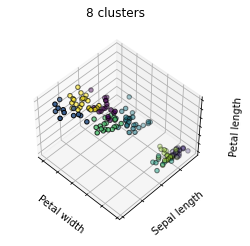

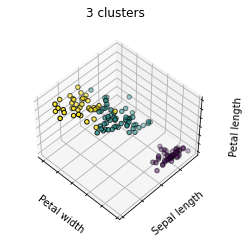

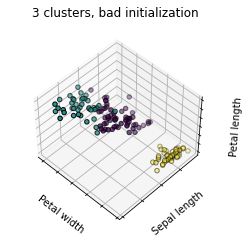

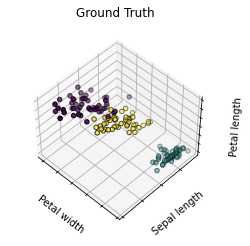

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]



fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
#     print(name,est)
#     break
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()


[4 1 4 1 2 1 3 3 1 0 0 1 0 3 1 1 3 4 0 1 0 4 1 2 1 1 3 0 3 1 0 1 3 2 0 4 4
 2 1 2 4 1 1 3 3 4 3 1 4 3 2 1 0 3 1 2 4 0 4 3 3 4 3 3 0 0 3 1 0 0 4 4 2 2
 0 0 4 3 2 4 1 1 0 4 3 2 1 4 1 1 3 0 0 4 4 3 3 2 1 3 3 4 3 0 3 2 0 1 1 0 0
 3 1 4 1 4 0 1 0 3 4 0 3 3 3 0 2 4 2 4 3 4 4 3 3 3 4 4 2 2 4 4 3 0 2 4 0 0
 3 4 2 0 1 4 2 2 0 3 4 0 1 2 3 2 1 1 2 1 2 3 2 3 4 0 1 1 4 4 0 2 3 1 1 2 0
 0 0 1 0 1 4 3 4 1 2 3 0 2 2 4 0 3 1 3 2 3 3 4 1 2 2 4 0 3 4 1 2 0 1 2 2 4
 0 1 0 0 0 1 1 3 0 4 4 1 3 2 0 2 3 1 4 0 1 1 2 3 0 4 4 3 4 2 4 4 4 4 1 0 4
 1 4 0 2 2 2 0 2 4 4 4 3 4 2 0 3 0 1 3 1 3 1 0 0 0 2 1 0 2 2 0 3 2 0 4 3 4
 4 1 0 0 2 0 4 1 2 3 1 4 0 3 1 3 0 2 2 2 2 2 2 2 2 3 2 3 2 0 1 4 1 2 2 1 0
 1 3 2 2 4 0 3 0 1 3 0 3 2 1 3 0 4 1 1 2 0 2 4 0 0 1 0 2 1 1 1 3 4 0 1 1 4
 0 4 0 4 4 2 1 3 4 0 2 4 3 3 4 3 0 0 3 3 3 4 0 3 1 0 3 3 4 4 3 4 2 1 2 3 4
 2 2 3 4 0 1 4 0 2 1 1 3 2 2 0 4 1 3 1 2 1 2 2 4 2 3 2 3 1 1 0 3 1 1 0 2 0
 3 3 4 1 2 0 1 2 2 1 2 3 4 4 3 0 2 3 4 2 0 4 0 2 2 3 4 4 2 1 0 1 0 0 3 2 2
 1 1 4 2 4 1 0 2 0 3 2 3 

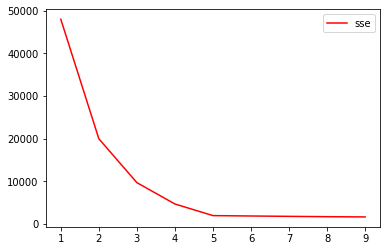

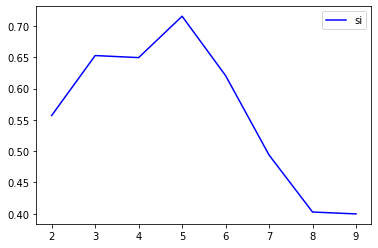

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

from sklearn.metrics import silhouette_score # 评估指标——轮廓系数

np.random.seed(5)


# X,Y = datasets.make_blobs(n_samples=300,n_features=4)

X,Y = datasets.make_blobs(n_samples=500,n_features=4,centers=5)
print(Y)

sses = []
sis = []
for k in range(1,10):
#     kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans = KMeans(n_clusters=k,init='random',max_iter=500)
    kmeans.fit(X)
    sse = kmeans.inertia_ ###误差平方和
    sses.append(sse)
    labels = kmeans.labels_
#     print(labels)
    if k>=2:
        si = silhouette_score(X,labels, metric='euclidean')
        sis.append(si)
#     print(labels)
# print(sses)

plt.figure(num=1)
plt.plot(range(1,10),sses,'r',label=u'sse')
plt.legend()


plt.figure(num=2)
plt.plot(range(2,10),sis,'b',label=u'si')
plt.legend()
plt.show()

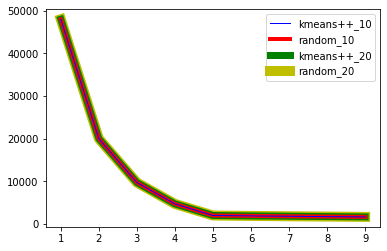

In [9]:
"""
n_clusters=8, 指定簇的数量，即K
init='k-means++', 指定初始化策略，默认'k-means++'。'random':随机选取K个样本的作为初始化中心点；
    也可以自己提供初始化中心点，shape=（n_clusters*n_features）
n_init=10,指定算法运行的次数，每次都会选择不同的初始化点，最终会选择最佳的分类簇作为最终的结果
max_iter=300, 指定单次最大迭代次数。所以算法总的最大迭代次数为max_ite*n_init
tol=1e-4, 收敛阈值
precompute_distances='auto',是否提前计算好样本的距离
verbose=0, 
random_state=None, 随机数种子
copy_x=True,
n_jobs=1, 
algorithm='auto'
"""
sses01 = []
sses02 = []
sses03 = []
sses04 = []

for k in range(1, 10):
    kmeans01 = KMeans(n_clusters=k)
    kmeans02 = KMeans(n_clusters=k, init='random')
    kmeans03 = KMeans(n_clusters=k, n_init=20)
    kmeans04 = KMeans(n_clusters=k, init='random', n_init=20)

    pre_labels01 = kmeans01.fit_predict(X)
    sse01 = kmeans01.inertia_
    sses01.append(sse01)
    pre_labels02 = kmeans02.fit_predict(X)
    sse02 = kmeans02.inertia_
    sses02.append(sse02)
    pre_labels03 = kmeans03.fit_predict(X)
    sse03 = kmeans03.inertia_
    sses03.append(sse03)
    pre_labels04 = kmeans04.fit_predict(X)
    sse04 = kmeans04.inertia_
    sses04.append(sse04)

plt.plot(range(1,10),sses01,'b',linewidth=1,zorder=3,label='kmeans++_10')
plt.plot(range(1,10),sses02,'r',linewidth=4,zorder=2,label='random_10')
plt.plot(range(1,10),sses03,'g',linewidth=7,zorder=1,label='kmeans++_20')
plt.plot(range(1,10),sses02,'y',linewidth=10,zorder=0,label='random_20')
plt.legend()
plt.show()

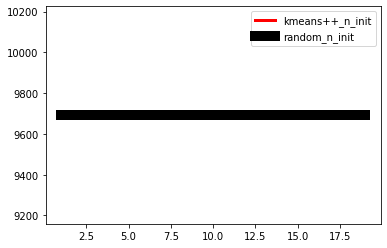

In [16]:
sses05 = []
sses06 = []
for n in range(1,20):
#     kmeans05 = KMeans(n_clusters=3, n_init=n)
    kmeans05 = KMeans(n_clusters=3, n_init=n,random_state=2)
    pre_labels05 = kmeans05.fit_predict(X)
    sse05 = kmeans05.inertia_
    sses05.append(sse05)
    
#     kmeans06 = KMeans(n_clusters=k, init='random', n_init=n)
    kmeans06 = KMeans(n_clusters=3, init='random', n_init=n,random_state=3)
    pre_labels06 = kmeans06.fit_predict(X)
    sse06 = kmeans05.inertia_
    sses06.append(sse06)
# print(sses05)
plt.plot(range(1,20),sses05,'r',linewidth=3,zorder=0,label='kmeans++_n_init')
plt.plot(range(1,20),sses06,'k',linewidth=10,zorder=1,label='random_n_init')
plt.legend()
plt.show()
